In [2]:
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
ecg = pd.read_csv('ECG Data.csv')

In [4]:
def minimum(row):
    m = row[0]
    for x in row:
        if (x < m):
            m = x
            
    return m

In [5]:
def maximum(row):
    m = row[0]
    for x in row:
        if (x > m):
            m = x
            
    return m

In [6]:
def mean(row):
    sum = 0
    
    for x in row:
        sum = sum + x
        
    m = sum / len(row)
    
    return m

In [7]:
def standard_dev(row):
    sum = 0
    
    for x in row:
        sum = sum + x
        
    mean = sum / len(row)
    
    for x in row:
       sum = sum + square(x - mean)

    std = sqrt(sum/len(row))
    return std                              

In [8]:
win_dict = {}
min_dict = {}
max_dict = {}
std_dict = {}
mean_dict = {}

min_list = []
max_list = []
std_list = []
mean_list = []


In [9]:
n=0
for x in range(0,len(ecg.columns),40):
    n=n+1
    win = ecg.iloc[:,x:x+40]
    win = win.to_numpy()
    win_dict['Window'+ str(n)] = win
    
    for y in win:
        
        min_list.append(minimum(y))
        max_list.append(maximum(y))
        mean_list.append(mean(y))
        std_list.append(standard_dev(y))


    min_dict['Window' + str(n)] = min_list
    max_dict['Window' + str(n)] = max_list
    mean_dict['Window' + str(n)] = mean_list
    std_dict['Window' + str(n)] = std_list 


In [10]:
L = ['Window1','Window2','Window3','Window4','Window5']

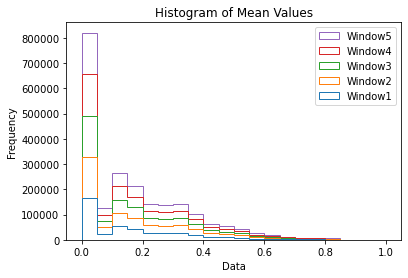

In [11]:
n_bins = 20
testing = [mean_dict[i] for i in L] 
plt.hist(testing,n_bins, histtype = 'step', stacked=True, label = [i for i in L])
plt.legend(loc='upper right')
plt.xlabel("Data")
plt.ylabel("Frequency")
plt.title("Histogram of Mean Values")
plt.show()

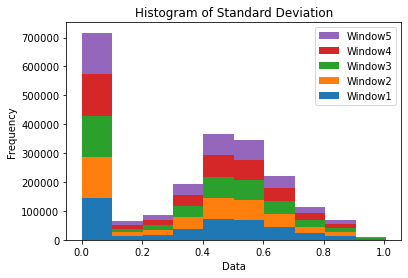

In [12]:
n_bins = 10
testing = [std_dict[i] for i in L] 
plt.hist(testing,n_bins, histtype = 'stepfilled', stacked=True, label = [i for i in L])
plt.legend(loc='upper right')
plt.xlabel("Data")
plt.ylabel("Frequency")
plt.title("Histogram of Standard Deviation")
plt.show()

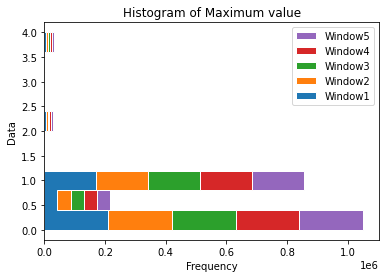

In [13]:
n_bins = 10
testing = [max_dict[i] for i in L] 

plt.hist(testing,n_bins, histtype = 'stepfilled', stacked=True, 
         edgecolor='w', orientation='horizontal', 
         label = [i for i in L])

plt.legend(loc='upper right')
plt.xlabel("Frequency")
plt.ylabel("Data")
plt.title("Histogram of Maximum value")
plt.show()

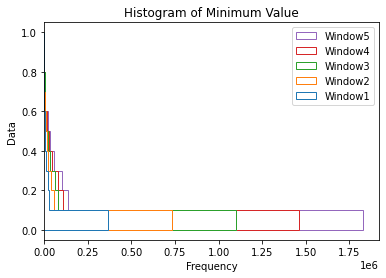

In [14]:
n_bins = 10
testing = [min_dict[i] for i in L] 

plt.hist(testing,n_bins, histtype = 'step', stacked=True, 
          orientation='horizontal', 
         label = [i for i in L])

plt.legend(loc='upper right')
plt.xlabel("Frequency")
plt.ylabel("Data")
plt.title("Histogram of Minimum Value")
plt.show()